In [1]:
import sys
sys.path.append('..')
import numpy as np
import pickle
import matplotlib.pyplot as plt
from skimage.transform import resize
from src.pointers import DATA_PATHS

In [2]:
dataset_names = ['halves_same_mnist', 'halves_mnist', 'halves_same_fashion', 'halves_fashion',
                 'stacked_same_mnist', 'stacked_mnist', 'stacked_same_fashion', 'stacked_fashion']
class_to_vis = 3
num_to_vis = 10
num_reps = 3
resize_factor = 3
side_len = 28

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/root/.local/share/virtualenvs/nn_clustering-Lo7V74L4/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarni

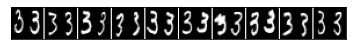

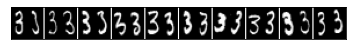

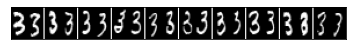

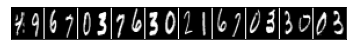

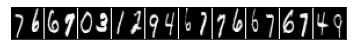

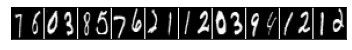

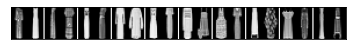

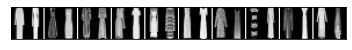

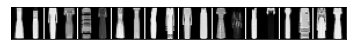

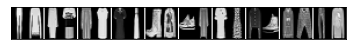

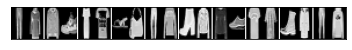

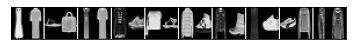

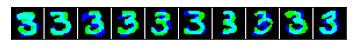

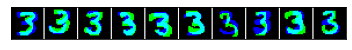

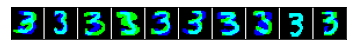

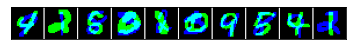

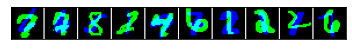

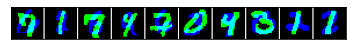

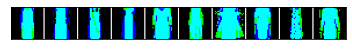

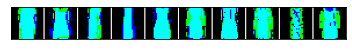

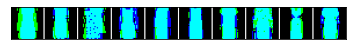

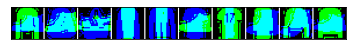

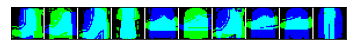

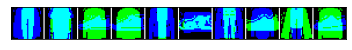

In [3]:
for dset in dataset_names:
    data_path = DATA_PATHS[dset]
    with open('.' + data_path, 'rb') as f:
        dataset = pickle.load(f)
    X_test = dataset['X_test']
    y_test = dataset['y_test']
    X_class = X_test[y_test==class_to_vis]
    for _ in range(num_reps):
        vis_ims = []
        vis_idxs = np.random.choice(np.arange(0,len(X_class)), size=num_to_vis, replace=False)
        for v_idx in vis_idxs:
            im = X_class[v_idx]
            if 'stacked' in dset:
                im = np.concatenate((np.expand_dims(np.zeros((im.shape[1], im.shape[2])), axis=0), im), axis=0)
                im = np.transpose(im, axes=(1, 2, 0))
                vis_ims.append(im)
                vis_ims.append(np.ones((im.shape[0], 1, im.shape[2])))
            else:
                vis_ims.append(im)
                vis_ims.append(255 * np.ones((im.shape[0], 1)))

        vis_final = np.hstack(vis_ims[:-1])

        plt.figure()
        plt.xticks([])
        plt.yticks([])
        if 'stacked' in dset:
            plt.imshow(vis_final)
        else:
            plt.imshow(vis_final, cmap='gray')
